In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import os
import random
import cv2
import h5py
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D
from skimage.segmentation import mark_boundaries
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
from keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input


In [2]:
im_shape = (224,224)
images = '/content/drive/MyDrive/Deep Learning/Database/33/COVID-19_Radiography_Dataset'

seed = 10

BATCH_SIZE = 20

In [3]:
folders = os.listdir(images)
print(folders)

['COVID', 'Viral Pneumonia']


In [4]:
data_generator = ImageDataGenerator( 
                              rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True
                            )
val_data_generator = ImageDataGenerator(rescale = 1./255,validation_split=0.3)

In [5]:
train_generator = data_generator.flow_from_directory(images, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(images, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 2257 images belonging to 2 classes.
Found 676 images belonging to 2 classes.
Classes: ['COVID', 'Viral Pneumonia']


In [6]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = "relu", input_shape = (224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D( 32, (3,3), activation = "relu", ))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 64,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 128,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 256,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.15))

model.add(Dense(2, activation = "softmax"))


model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])




model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        1

In [7]:
hist = model.fit(train_generator,
                 validation_data=validation_generator,
                 batch_size=20,
                 epochs = 40
                )



Epoch 1/40
113/113 [==============================] - 373s 3s/step - loss: 0.4411 - accuracy: 0.7674 - val_loss: 0.1816 - val_accuracy: 0.9601
Epoch 2/40
113/113 [==============================] - 180s 2s/step - loss: 0.1749 - accuracy: 0.9384 - val_loss: 0.0984 - val_accuracy: 0.9719
Epoch 3/40
113/113 [==============================] - 188s 2s/step - loss: 0.1534 - accuracy: 0.9433 - val_loss: 0.0879 - val_accuracy: 0.9675
Epoch 4/40
113/113 [==============================] - 183s 2s/step - loss: 0.1333 - accuracy: 0.9579 - val_loss: 0.1241 - val_accuracy: 0.9615
Epoch 5/40
113/113 [==============================] - 180s 2s/step - loss: 0.1369 - accuracy: 0.9539 - val_loss: 0.0730 - val_accuracy: 0.9778
Epoch 6/40
113/113 [==============================] - 173s 2s/step - loss: 0.1192 - accuracy: 0.9553 - val_loss: 0.1053 - val_accuracy: 0.9615
Epoch 7/40
113/113 [==============================] - 166s 1s/step - loss: 0.1142 - accuracy: 0.9619 - val_loss: 0.0941 - val_accuracy: 0.9704

In [8]:
model.save('covid_model.h5')

In [9]:
print("training_accuracy", hist.history['accuracy'][-1])
print("validation_accuracy", hist.history['val_accuracy'][-1])

training_accuracy 0.9822773337364197
validation_accuracy 0.9970414042472839


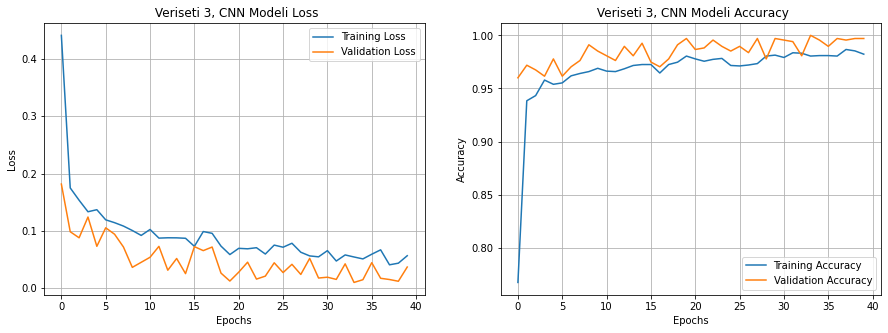

In [10]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.title(" Veriseti 3, CNN Modeli Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title(" Veriseti 3, CNN Modeli Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.show()

34/34 [==============================] - 20s 558ms/step


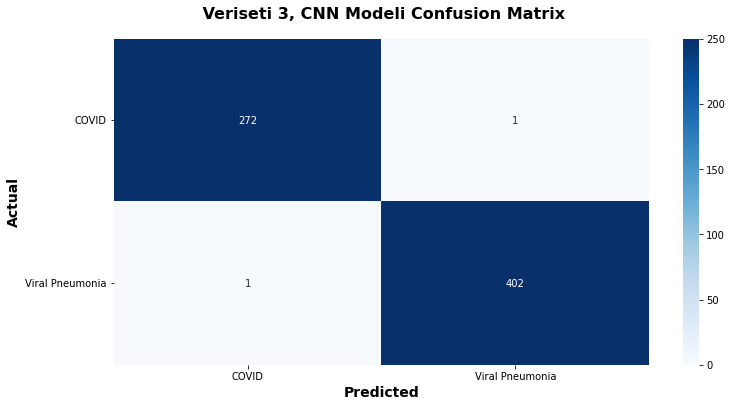

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef

classes = ['COVID', 'Viral Pneumonia']

y_pred = model.predict(validation_generator)
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=validation_generator.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))

ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title(' Veriseti 3, CNN Modeli Confusion Matrix',fontsize = 16,weight = 'bold',pad=20);

In [12]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       403

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676



In [13]:
print("3. Veriseti - CNN Modeli")
print('Precision: %.3f' % precision_score(y_true, predictions))
print('Recall: %.3f' % recall_score(y_true, predictions))
print('Accuracy: %.3f' % accuracy_score(y_true, predictions))
print('F1 Score: %.3f' % f1_score(y_true, predictions))
print('Positive Predictive Value (PPV) Score: %.3f' % precision_score(y_true, predictions))
print('Matthews correlation coefficient (MCC) Score: %.3f' % matthews_corrcoef(y_true, predictions))

3. Veriseti - CNN Modeli
Precision: 0.998
Recall: 0.998
Accuracy: 0.997
F1 Score: 0.998
Positive Predictive Value (PPV) Score: 0.998
Matthews correlation coefficient (MCC) Score: 0.994


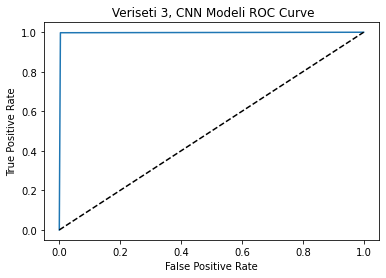

In [14]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_true, predictions)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], "k--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(" Veriseti 3, CNN Modeli ROC Curve")
plt.show()